Import libraries

In [34]:
# import libraries
import numpy as np
import pandas as pd

# Exploratory Data Analysis

## Importing Data

In [35]:
# import kagglehub for importing data from kaggle
import kagglehub as kh

In [36]:
# download real estate prices dataet
path = kh.dataset_download("oktayrdeki/houses-in-london", path='london_houses.csv')

In [37]:
# read csv
df = pd.read_csv(path)

## Data Inspection

Head of the data

In [38]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


Shape of the data

In [39]:
df.shape

(1000, 17)

Data information

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

Target variable

In [41]:
target = df.columns[-1]
print(f'The target variable is {target}') 

The target variable is Price (£)


Target variable dtype

In [42]:
df[target].dtype

dtype('int64')

Feature variables

In [43]:
features = df.columns[:-1].to_list()
print(features)

['Address', 'Neighborhood', 'Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Garden', 'Garage', 'Floors', 'Property Type', 'Heating Type', 'Balcony', 'Interior Style', 'View', 'Materials', 'Building Status']


Check for missing data

In [44]:
df.isna().any()

Address            False
Neighborhood       False
Bedrooms           False
Bathrooms          False
Square Meters      False
Building Age       False
Garden             False
Garage             False
Floors             False
Property Type      False
Heating Type       False
Balcony            False
Interior Style     False
View               False
Materials          False
Building Status    False
Price (£)          False
dtype: bool

Number of unique values of the features

In [45]:
display(df.nunique())

Address            770
Neighborhood        10
Bedrooms             5
Bathrooms            3
Square Meters      197
Building Age        99
Garden               2
Garage               2
Floors               3
Property Type        3
Heating Type         4
Balcony              3
Interior Style       4
View                 5
Materials            4
Building Status      3
Price (£)          786
dtype: int64

Numerical features

In [46]:
numerical_features = df.drop(target, axis=1).select_dtypes(include='int64').columns.to_list()
display(numerical_features)

['Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Floors']

In [47]:
print(f'There are {len(numerical_features)} numerical features')

There are 5 numerical features


Categorical features

In [48]:
categorical_features = df.drop(target, axis=1).select_dtypes(include='object').columns.to_list()
display(categorical_features)

['Address',
 'Neighborhood',
 'Garden',
 'Garage',
 'Property Type',
 'Heating Type',
 'Balcony',
 'Interior Style',
 'View',
 'Materials',
 'Building Status']

In [49]:
print(f'There are {len(categorical_features)} categorical_features')

There are 11 categorical_features


Data description

In [50]:
df.describe()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price (£)
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06


## Data Analysis

### Univariate Analysis

In [51]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Target Variable

Distribution of the target variable

In [52]:
sns.set_theme()

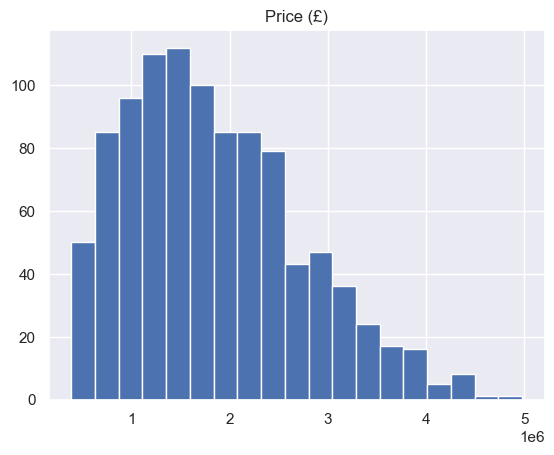

In [53]:
df[target].hist(bins='auto');
plt.title(target)
plt.show();

#### Numerical Features

In [54]:
numerical_features

['Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Floors']

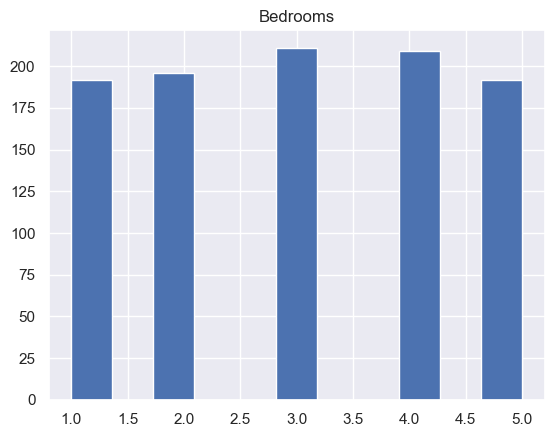

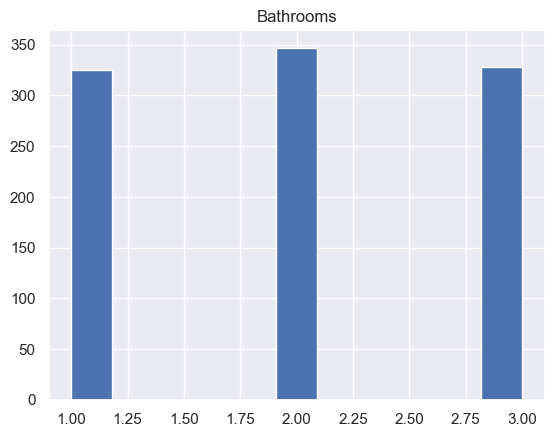

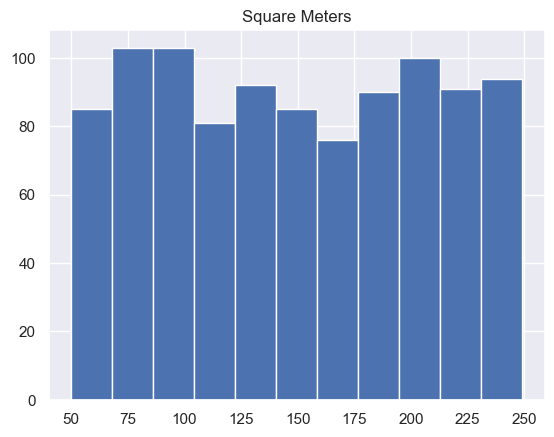

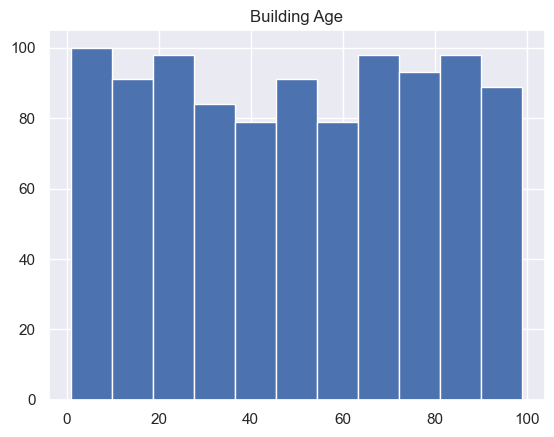

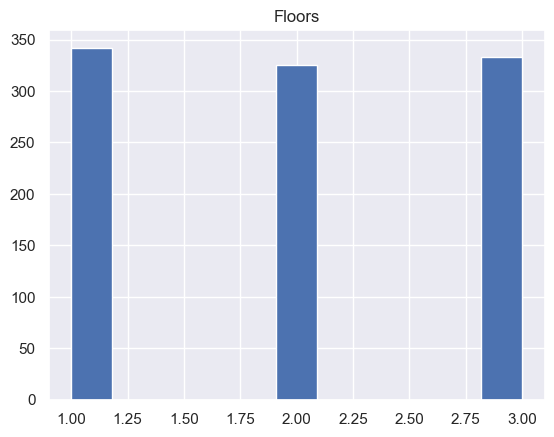

In [55]:
for feature in numerical_features:
    df[feature].hist(bins='auto');
    plt.title(feature);
    plt.show();

Boxplot of the numerical features

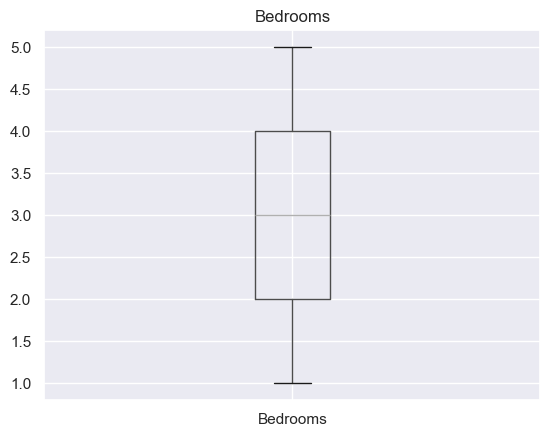

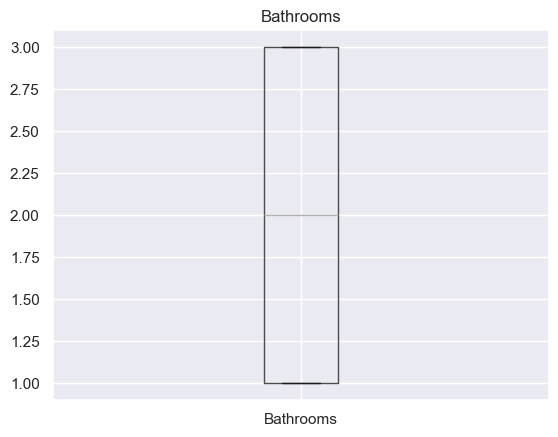

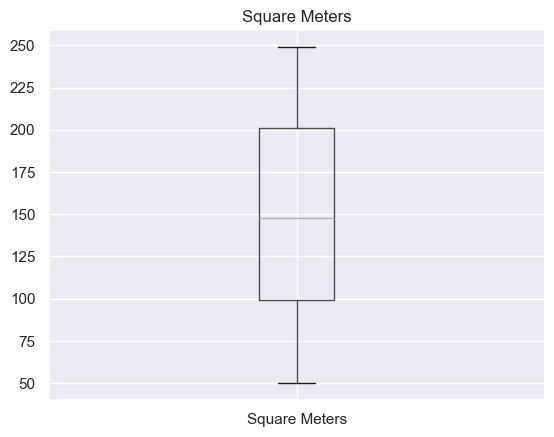

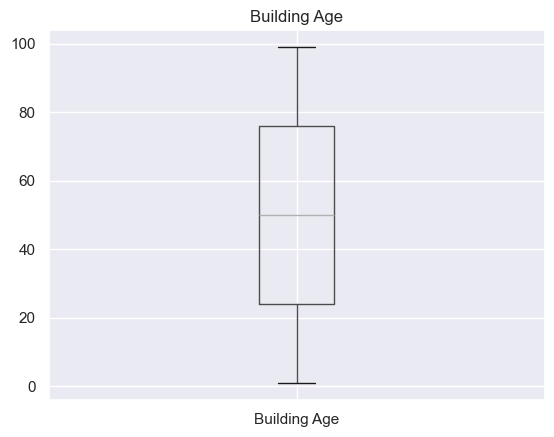

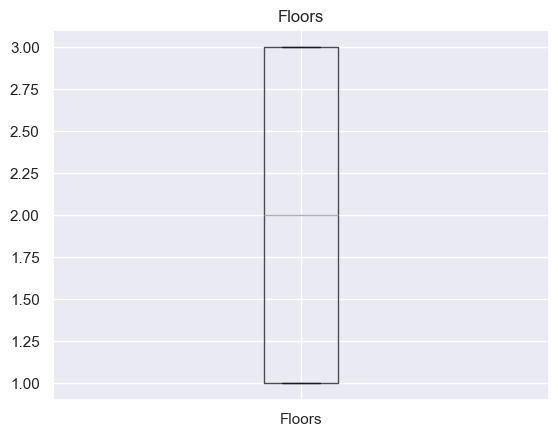

In [56]:
for feature in numerical_features:
    df[[feature]].boxplot();
    plt.title(feature);
    plt.show();

Remove the street numbers from the addresses

In [57]:
address=[]
for i,entry in enumerate(df['Address'].to_list()):
    address.append(entry.split(maxsplit=1)[-1])

In [58]:
df['Address']=address

New number of unique variables for 'Address'

In [59]:
display(df['Address'].nunique())

10

#### Categorical Features

Distribution of the categorical features

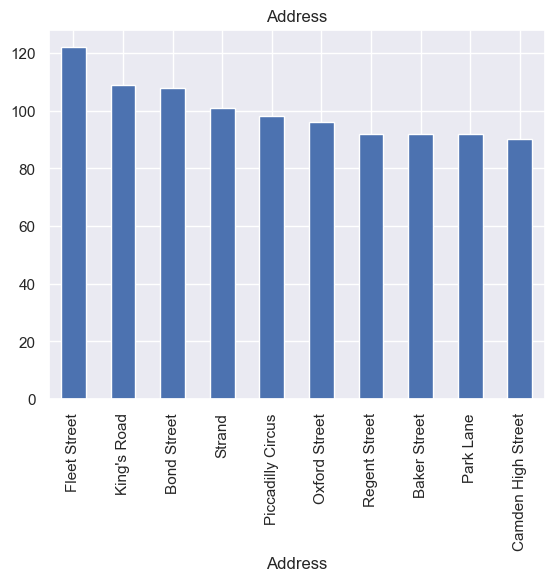

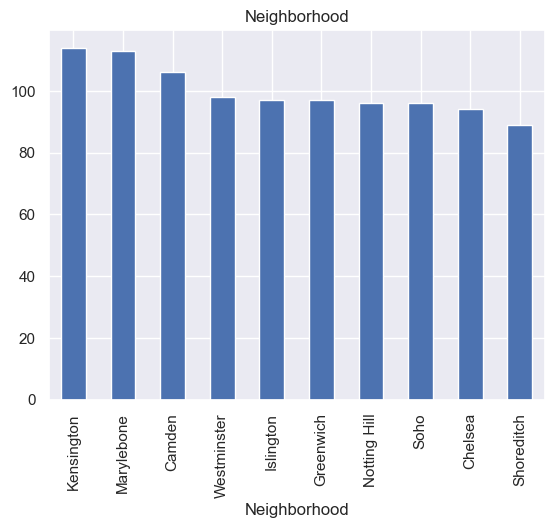

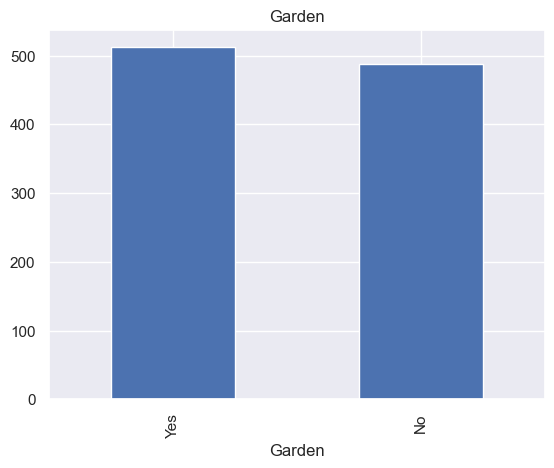

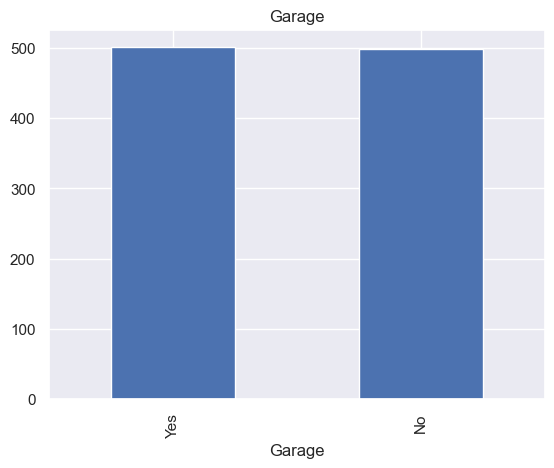

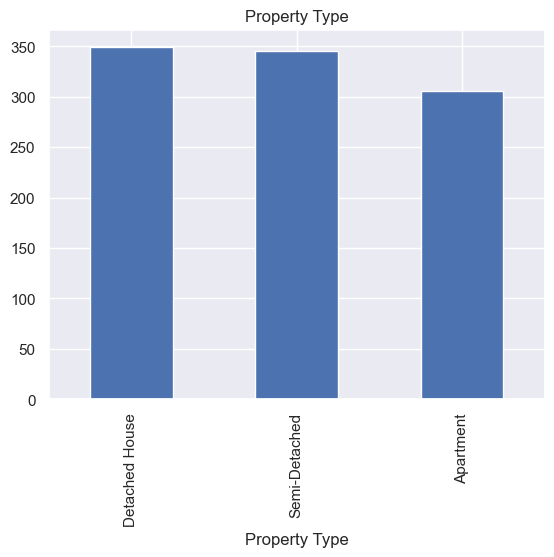

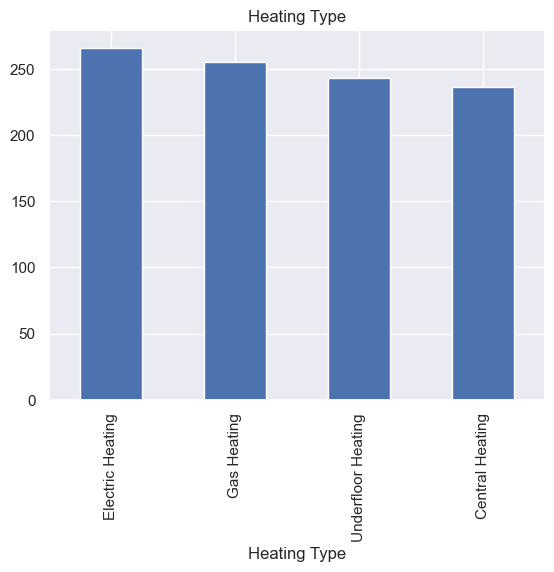

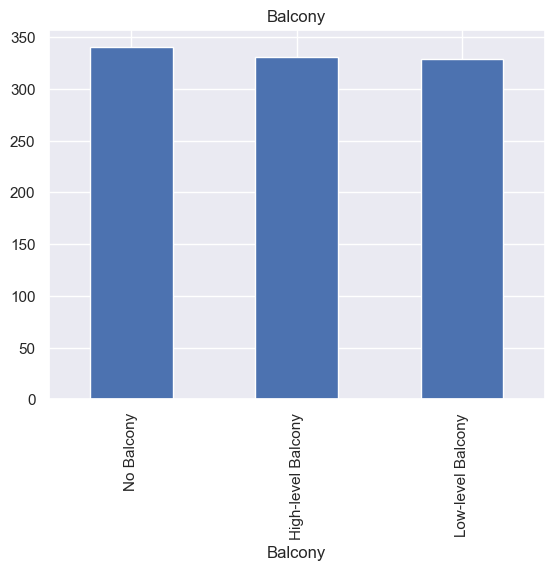

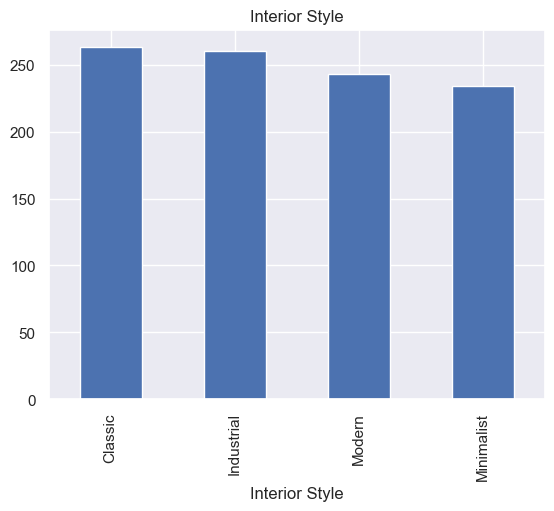

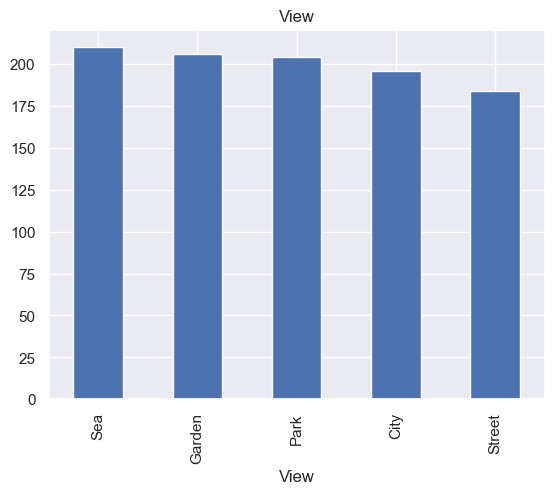

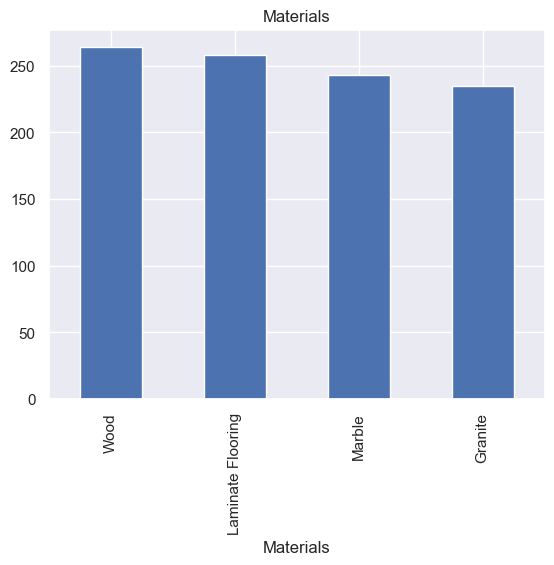

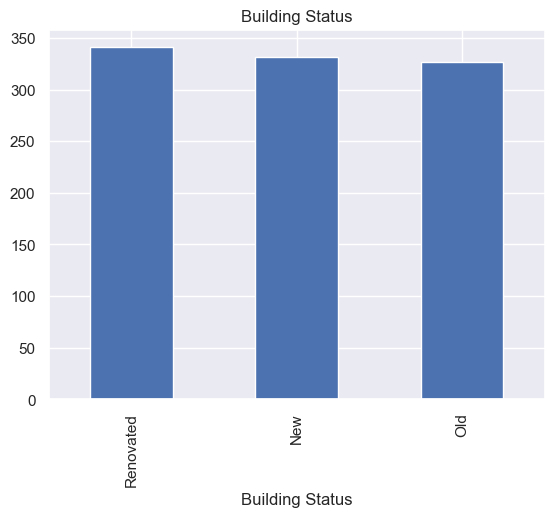

In [60]:
for feature in categorical_features:
    df[feature].value_counts().plot.bar();
    plt.title(feature);
    plt.show();

### Bivarite Analysis

In [61]:
# import libraries
import seaborn as sns

Scatterplots of the target variable vs the numerical features

Separate the discrete numerical features

In [62]:
# discrete features
discrete_features = (df.drop(target,axis=1).select_dtypes(include='int64').nunique()<=10)
discrete_features = discrete_features.keys()[discrete_features==True]

display(discrete_features)


Index(['Bedrooms', 'Bathrooms', 'Floors'], dtype='object')

In [63]:
# continuous features
continuous_features=numerical_features
for feature in discrete_features:
    continuous_features.remove(feature)
display(continuous_features)

['Square Meters', 'Building Age']

#### Numerical Features

Scatterplots of target variable vs the continuous numerical features

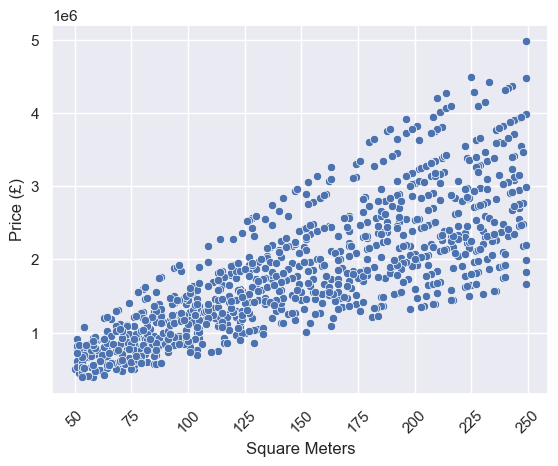

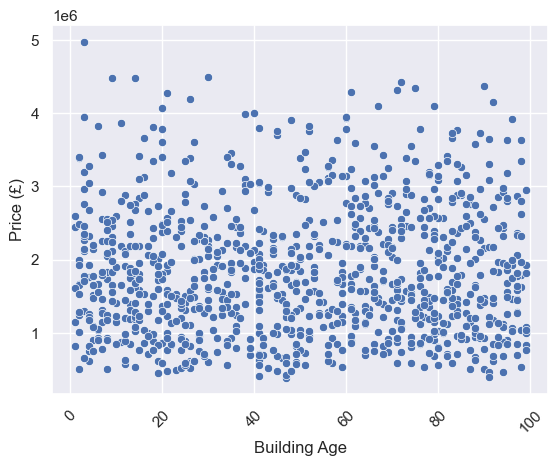

In [64]:
for feature in continuous_features:
    sns.scatterplot(df,x=feature,y=target);
    plt.xticks(rotation=45);
    plt.show();

Boxplots of the target variable vs. the discrete numerical features

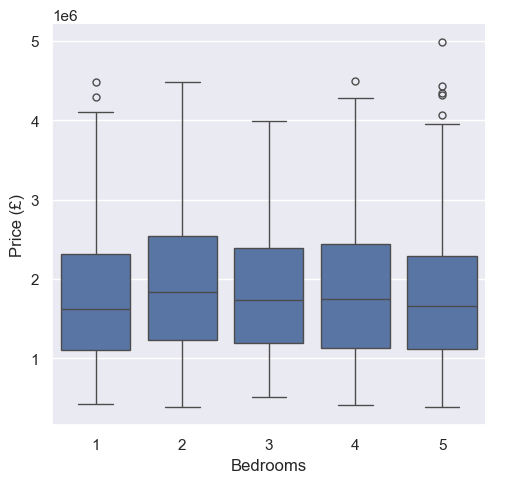

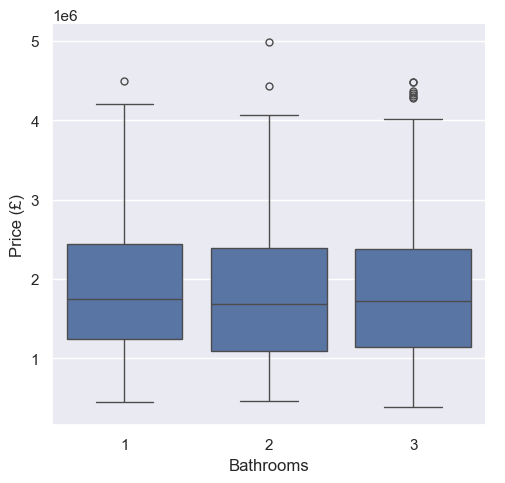

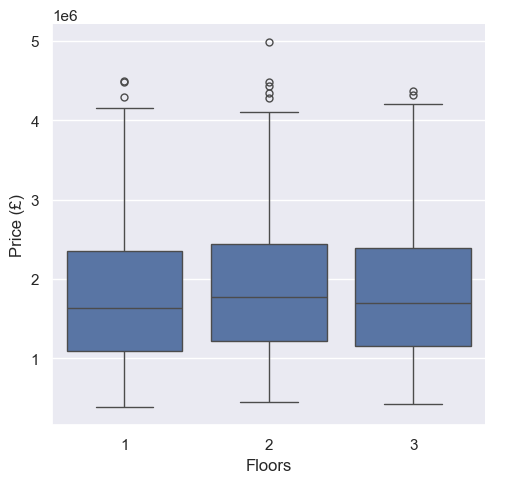

In [65]:
for feature in discrete_features:
    sns.catplot(df,x=feature,y=target,kind='box');
    plt.show();

#### Categorical Features

Boxplots of the target variable vs. the categorical features

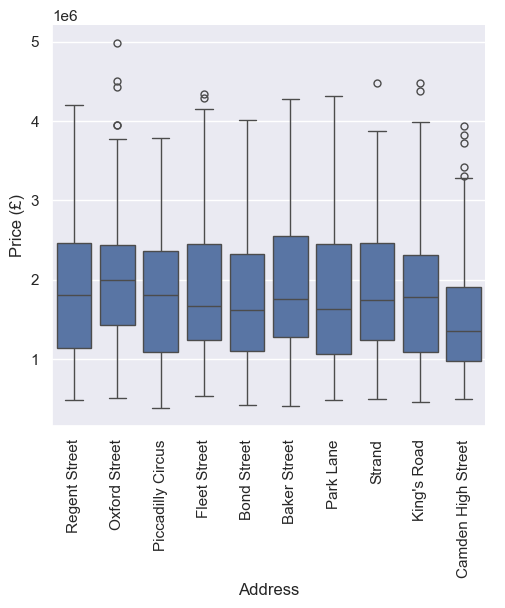

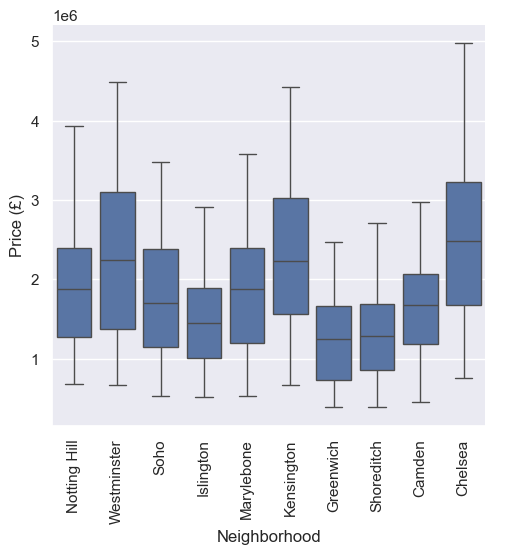

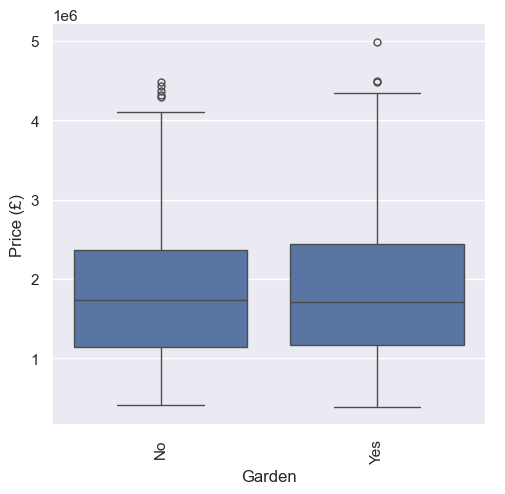

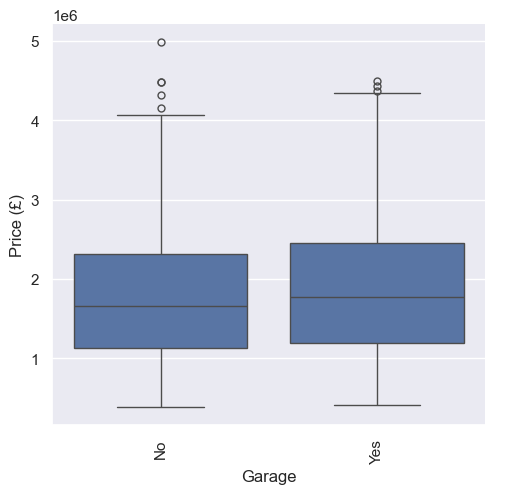

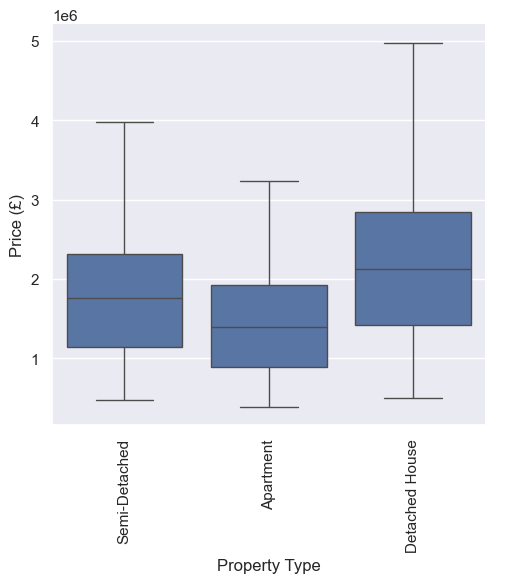

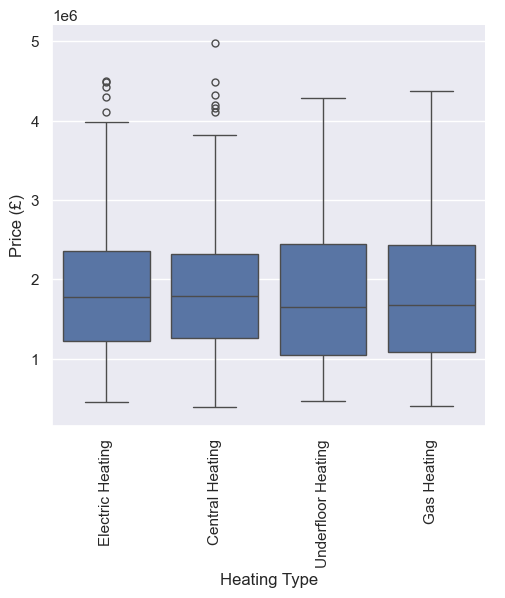

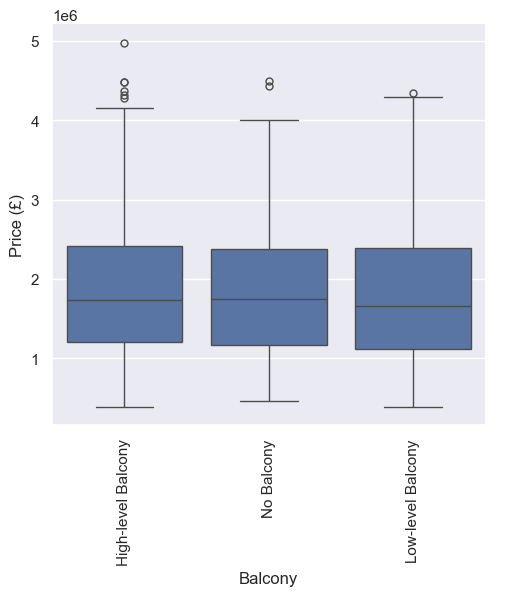

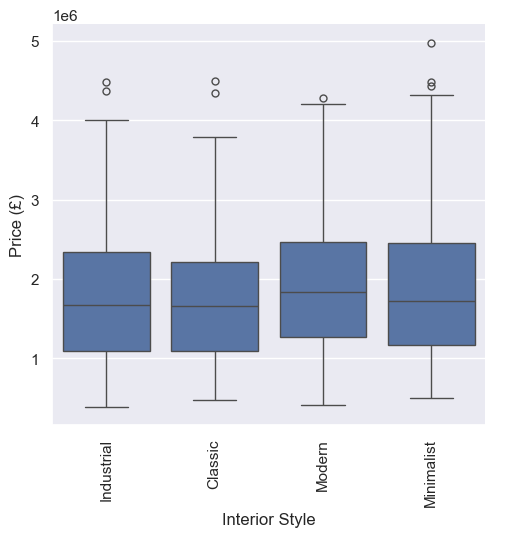

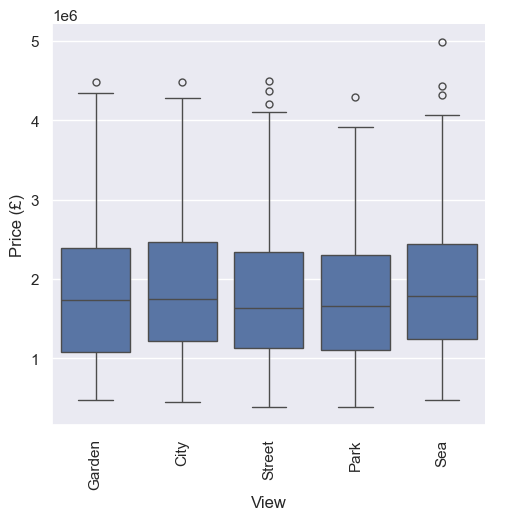

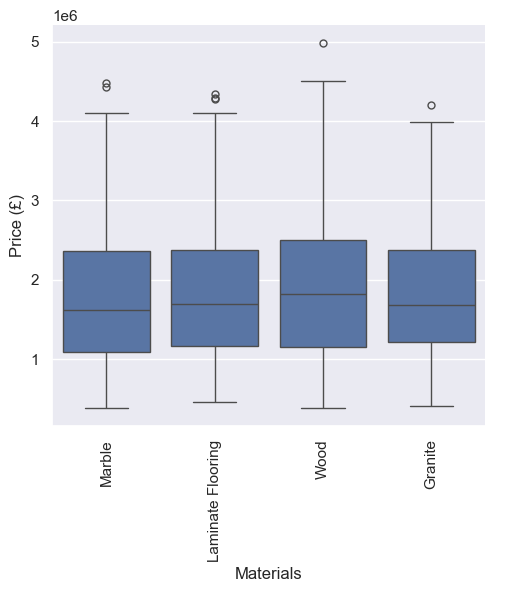

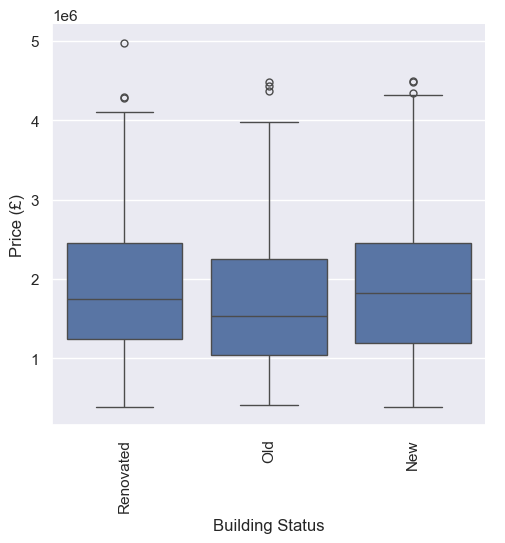

In [66]:
for feature in categorical_features:
    sns.catplot(df,x=feature,y=target,kind='box');
    plt.xticks(rotation=90);
    plt.show();

### Multivariate Analaysis

Correlation matrix of the numerical features

In [67]:
# correlation matrix
corr=df.corr(numeric_only=True)

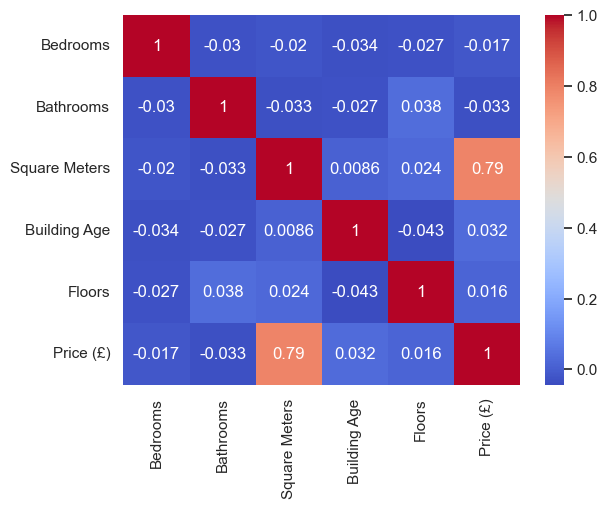

In [68]:
# heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');
plt.show();

Scatterplot of square meters grouped by Neighborhood and Poperty Type

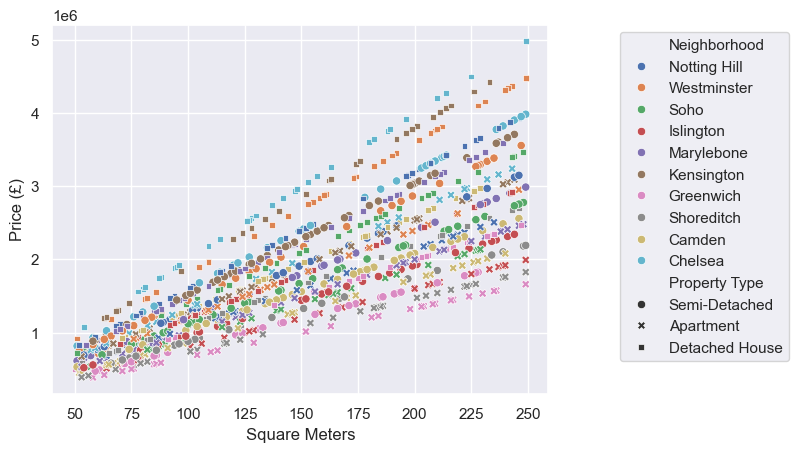

In [69]:
sns.scatterplot(data=df,x='Square Meters',y=target,hue='Neighborhood',style='Property Type');
plt.legend(bbox_to_anchor=(1., 0.5, 0.5, 0.5));
plt.show();

## Feature Engineering

### Feature Encoding

In [70]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [71]:
display(categorical_features)

['Address',
 'Neighborhood',
 'Garden',
 'Garage',
 'Property Type',
 'Heating Type',
 'Balcony',
 'Interior Style',
 'View',
 'Materials',
 'Building Status']

Binarize data for binary categorical features

Features to binarize

In [72]:
# categorical features to binarize
binary_features = df.drop(target,axis=1).columns[df.drop(target, axis=1).nunique()==2].to_list()
display(binary_features)

['Garden', 'Garage']

In [73]:
# create a LabelBinarizer
lb = LabelBinarizer()

In [74]:
# binarize each binary feature
for feature in binary_features:
    df[feature]=lb.fit_transform(df[feature])

In [75]:
df[binary_features].head()

,Garden,Garage
0,0,0
1,1,0
2,0,1
3,1,1
4,0,1


One-hot encoding

Features to one-hot encode

In [76]:
onehot_features = categorical_features
for feature in binary_features:
    onehot_features.remove(feature)

In [77]:
onehot_features

['Address',
 'Neighborhood',
 'Property Type',
 'Heating Type',
 'Balcony',
 'Interior Style',
 'View',
 'Materials',
 'Building Status']

In [78]:
# create a one-hot encoder
ohe = OneHotEncoder(sparse_output=False)

In [79]:
# one-hot encode each categorical feature excluding the binary features
new_feature_names = []
for feature in onehot_features:
    encoded_feature = ohe.fit_transform(df[[feature]])
    encoded_feature = pd.DataFrame(encoded_feature, columns=ohe.get_feature_names_out())
    df = pd.concat([df.reset_index(drop=True),encoded_feature],axis=1)
    df = df.drop(feature, axis=1)
    for name in ohe.get_feature_names_out():
        new_feature_names.append(name)

In [80]:
new_feature_names

['Address_Baker Street',
 'Address_Bond Street',
 'Address_Camden High Street',
 'Address_Fleet Street',
 "Address_King's Road",
 'Address_Oxford Street',
 'Address_Park Lane',
 'Address_Piccadilly Circus',
 'Address_Regent Street',
 'Address_Strand',
 'Neighborhood_Camden',
 'Neighborhood_Chelsea',
 'Neighborhood_Greenwich',
 'Neighborhood_Islington',
 'Neighborhood_Kensington',
 'Neighborhood_Marylebone',
 'Neighborhood_Notting Hill',
 'Neighborhood_Shoreditch',
 'Neighborhood_Soho',
 'Neighborhood_Westminster',
 'Property Type_Apartment',
 'Property Type_Detached House',
 'Property Type_Semi-Detached',
 'Heating Type_Central Heating',
 'Heating Type_Electric Heating',
 'Heating Type_Gas Heating',
 'Heating Type_Underfloor Heating',
 'Balcony_High-level Balcony',
 'Balcony_Low-level Balcony',
 'Balcony_No Balcony',
 'Interior Style_Classic',
 'Interior Style_Industrial',
 'Interior Style_Minimalist',
 'Interior Style_Modern',
 'View_City',
 'View_Garden',
 'View_Park',
 'View_Sea',
 

In [81]:
df.head()

,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Price (£),Address_Baker Street,Address_Bond Street,...,View_Park,View_Sea,View_Street,Materials_Granite,Materials_Laminate Flooring,Materials_Marble,Materials_Wood,Building Status_New,Building Status_Old,Building Status_Renovated
0,2,3,179,72,0,0,3,2291200,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1,123,34,1,0,1,1476000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5,3,168,38,0,1,3,1881600,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,5,1,237,53,1,1,1,1896000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1,127,23,0,1,2,1524000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


New feature names

### Feature Scaling

In [82]:
# import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Standard scaling of the numerical features

In [83]:
# create a MinMaxScaler
mms = MinMaxScaler()

Fit MinMaxScaler on the training data

Splitting the data into 90% train and 10% test set

In [84]:
# feature data frame
X = df.drop(target, axis=1)
y = df[target].values

In [85]:
# train test split with 90% train data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9, random_state=1)

In [86]:
# fit on the training data
mms.fit(X_train[numerical_features])

MinMaxScaler()

In [87]:
# transform based on the fitted data
X_train[numerical_features] = mms.transform(X_train[numerical_features])
X_test[numerical_features] = mms.transform(X_test[numerical_features])

In [88]:
X_train[target]=y_train
X_test[target]=y_test
df_train=X_train
df_test=X_test

In [89]:
# update data with the scaled variables
df = pd.concat([df_train,df_test]).sort_index()

# Model Fitting

## Data Splitting

In [90]:
# feature data frame
X = df.drop(target, axis=1)
# target variable array
y = df[target].values

Splitting the data into 90% train and 10% test

In [91]:
# splitting the data into 90% train and 10% test
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.9, random_state=1)

## Baseline Model

In [92]:
# import libraries
from sklearn.dummy import DummyRegressor

# score
from sklearn.metrics import root_mean_squared_error, r2_score

Baseline model predicting the mean of the target variable

In [93]:
# create a DummyRegressor
dummy = DummyRegressor(strategy='mean')

In [94]:
# fit
dummy.fit(X_train, y_train)

DummyRegressor()

In [95]:
# predict
y_pred_dummy = dummy.predict(X_test)

Mean squared error of the model

In [96]:
# rmse
rmse_d = root_mean_squared_error(y_test,y_pred_dummy)
display(rmse_d)
# r2
r2_d = r2_score(y_test,y_pred_dummy)
display(r2_d)

920459.5708000504

-0.009983915461096116

## Linear Regression

In [97]:
# import libraries
from sklearn.linear_model import LinearRegression

# inspection
from sklearn.inspection import permutation_importance

# feature selection
from sklearn.feature_selection import RFECV

In [98]:
# create LinearRegression object
reg_lr = LinearRegression()

### Feature Selection

Recursive feature selection with cross-validation

In [99]:
rfe = RFECV(estimator=reg_lr,min_features_to_select=1,cv=5,scoring='r2',n_jobs=-2)

In [100]:
# fit
rfe = rfe.fit(X_train, y_train)
print(f'Number of features selected:{rfe.n_features_}')

Number of features selected:47


In [101]:
# selector index
idx_rfe = rfe.support_
# transform train and test data
X_train_rfe = X_train[X_train.columns[idx_rfe]]
X_test_rfe = X_test[X_test.columns[idx_rfe]]

In [158]:
# selected features
display(X_train.columns[idx_rfe].to_list())

['Bedrooms',
 'Bathrooms',
 'Square Meters',
 'Building Age',
 'Garden',
 'Garage',
 'Floors',
 'Address_Baker Street',
 'Address_Oxford Street',
 'Address_Regent Street',
 'Address_Strand',
 'Neighborhood_Camden',
 'Neighborhood_Chelsea',
 'Neighborhood_Greenwich',
 'Neighborhood_Islington',
 'Neighborhood_Kensington',
 'Neighborhood_Shoreditch',
 'Neighborhood_Westminster',
 'Property Type_Apartment',
 'Property Type_Detached House',
 'Heating Type_Electric Heating',
 'Heating Type_Underfloor Heating',
 'Balcony_High-level Balcony',
 'Balcony_No Balcony',
 'Interior Style_Minimalist',
 'View_Park',
 'View_Sea']

### Fitting

In [103]:
# fit moodel
reg_lr.fit(X_train_rfe,y_train)

LinearRegression()

In [104]:
# predict
y_pred_lr = reg_lr.predict(X_test_rfe)

In [105]:
# rmse
rmse_lr = root_mean_squared_error(y_test,y_pred_lr)
display(rmse_lr)
# r2
r2_lr = r2_score(y_test,y_pred_lr)
display(r2_lr)

235979.1357233728

0.933617709394474

## Random Forest

In [106]:
# import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

### Feature Selection

In [107]:
# create RandomForestRegressor object
reg_rf = RandomForestRegressor(random_state=1, criterion='friedman_mse', max_depth=None, bootstrap=True, oob_score=root_mean_squared_error, n_jobs=-2)

Recursive feature selection with cross-validation

In [108]:
# rfe object
rfe = RFECV(estimator=reg_rf,cv=5,min_features_to_select=1,n_jobs=-2,scoring='r2')

In [109]:
# fit
rfe.fit(X_train,y_train)
print(f'Number of features selected:{rfe.n_features_}')

Number of features selected:17


In [110]:
# selector index
idx_rfe = rfe.support_

In [111]:
# selected features
display(X_train.columns[idx_rfe].to_list())

['Bedrooms',
 'Bathrooms',
 'Square Meters',
 'Building Age',
 'Neighborhood_Camden',
 'Neighborhood_Chelsea',
 'Neighborhood_Greenwich',
 'Neighborhood_Islington',
 'Neighborhood_Kensington',
 'Neighborhood_Marylebone',
 'Neighborhood_Notting Hill',
 'Neighborhood_Shoreditch',
 'Neighborhood_Soho',
 'Neighborhood_Westminster',
 'Property Type_Apartment',
 'Property Type_Detached House',
 'Property Type_Semi-Detached']

In [112]:
# filter data with the selected features
X_train_rfe = X_train[X_train.columns[idx_rfe]]
X_test_rfe = X_test[X_test.columns[idx_rfe]]

### Fitting

In [113]:
# tuning parameters
param_grid = {
    'n_estimators':[100,150,200], 
    'max_features':['sqrt','log2',None],
    'ccp_alpha':[0,0.01,0.1,0.5]
}

In [114]:
# cross validation
gs = GridSearchCV(estimator=reg_rf,param_grid=param_grid,scoring='neg_mean_squared_error', cv=5, n_jobs=-2)

In [115]:
# fit
gs.fit(X_train_rfe,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='friedman_mse',
                                             n_jobs=-2,
                                             oob_score=<function root_mean_squared_error at 0x000002C4CD91BC40>,
                                             random_state=1),
             n_jobs=-2,
             param_grid={'ccp_alpha': [0, 0.01, 0.1, 0.5],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [116]:
# best estimator
gs.best_estimator_

RandomForestRegressor(ccp_alpha=0, criterion='friedman_mse', max_features=None,
                      n_estimators=150, n_jobs=-2,
                      oob_score=<function root_mean_squared_error at 0x000002C4CD91BC40>,
                      random_state=1)

In [117]:
# best parameters
gs.best_params_

{'ccp_alpha': 0, 'max_features': None, 'n_estimators': 150}

In [118]:
# predict using the best predictor
reg_rf=gs.best_estimator_
y_pred_rf = reg_rf.predict(X_test_rfe)

In [119]:
# rmse
rmse_rf = root_mean_squared_error(y_test,y_pred_rf)
display(rmse_rf)
# r2
r2_rf = r2_score(y_test,y_pred_rf)
display(r2_rf)

120636.94636786585

0.982651349700446

## Gradient Boosting

In [161]:
# import libraries
from sklearn.ensemble import GradientBoostingRegressor

### Feature Selection

In [197]:
# create a GradientBoostingRegressor object
reg_gb = GradientBoostingRegressor(loss='squared_error',criterion='friedman_mse',random_state=1,n_iter_no_change=10,tol=1e-4)

Recursive feature selection with cross-validation

In [198]:
# rfe object
rfe = RFECV(estimator=reg_gb,cv=5,min_features_to_select=1,n_jobs=-2,scoring='r2')

In [199]:
# fit
rfe.fit(X_train,y_train)
print(f'Number of features selected:{rfe.n_features_}')

Number of features selected:13


In [200]:
# selector index
idx_rfe = rfe.support_

In [201]:
# selected features
display(X_train.columns[idx_rfe].to_list())

['Bathrooms',
 'Square Meters',
 'Neighborhood_Camden',
 'Neighborhood_Chelsea',
 'Neighborhood_Greenwich',
 'Neighborhood_Islington',
 'Neighborhood_Kensington',
 'Neighborhood_Notting Hill',
 'Neighborhood_Shoreditch',
 'Neighborhood_Soho',
 'Neighborhood_Westminster',
 'Property Type_Apartment',
 'Property Type_Detached House']

In [202]:
# filter data with the selected features
X_train_rfe = X_train[X_train.columns[idx_rfe]]
X_test_rfe = X_test[X_test.columns[idx_rfe]]

### Fitting

In [203]:
# tuning parameters
param_grid = {
    'learning_rate':[0.05,0.1,0.15],
    'n_estimators':[100,250,300],
    'subsample':[0.75,1],
    'max_depth':[3,6,9],
    'max_features':['sqrt','log2',None]        
}

In [204]:
# cross-validation
gs = GridSearchCV(estimator=reg_gb, param_grid=param_grid,scoring='neg_mean_squared_error',n_jobs=-2,cv=5, error_score='raise')

In [205]:
# fit
gs.fit(X_train_rfe,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=GradientBoostingRegressor(n_iter_no_change=10,
                                                 random_state=1),
             n_jobs=-2,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 250, 300],
                         'subsample': [0.75, 1]},
             scoring='neg_mean_squared_error')

In [206]:
# best estimator
gs.best_estimator_

GradientBoostingRegressor(learning_rate=0.15, n_estimators=300,
                          n_iter_no_change=10, random_state=1, subsample=0.75)

In [207]:
# best parameters
gs.best_params_

{'learning_rate': 0.15,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.75}

In [208]:
# predict using the best estimator
reg_gb=gs.best_estimator_
y_pred_gb = reg_gb.predict(X_test_rfe)

In [209]:
# rmse
rmse_gb = root_mean_squared_error(y_test,y_pred_gb)
display(rmse_gb)
# r2 
r2_gb = r2_score(y_test,y_pred_gb)
display(r2_gb)

45439.97102589161

0.9975386061371715

In [210]:
# no of iterations
n_estimators = reg_gb.n_estimators_
# boostin errors dataframe
boosting_errors = pd.DataFrame(
    {
        'Number of iterations':range(1, n_estimators+1),
        'rmse': [root_mean_squared_error(y_test,y_pred) for y_pred in reg_gb.staged_predict(X_test_rfe)]
    }
).set_index('Number of iterations');

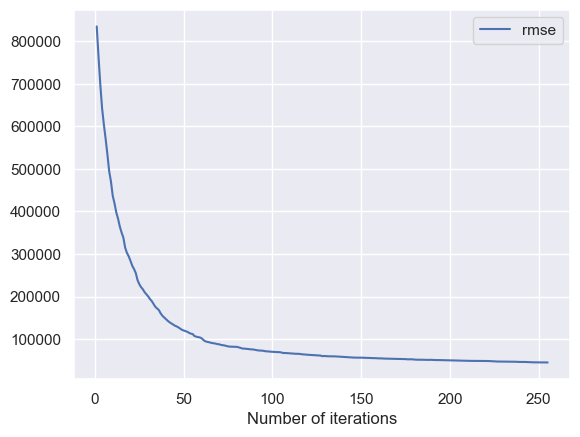

In [213]:
# plot of boosting errors
boosting_errors.plot();
plt.show();

## Ada Boost

In [134]:
# import libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

### Feature Selection

In [135]:
# create an AdaBoostRegressor object
reg_ab = AdaBoostRegressor(random_state=1, loss='square')


Recursive feature selection with cross-validation

In [136]:
# rfe object
rfe = RFECV(estimator=reg_ab,cv=5,min_features_to_select=1,n_jobs=-2,scoring='r2')

In [137]:
# fit
rfe.fit(X_train,y_train)
print(f'Number of features selected:{rfe.n_features_}')

Number of features selected:27


In [138]:
# selector index
idx_rfe = rfe.support_

In [139]:
# selected features
display(X_train.columns[idx_rfe].to_list())

['Bedrooms',
 'Bathrooms',
 'Square Meters',
 'Building Age',
 'Garden',
 'Garage',
 'Floors',
 'Address_Baker Street',
 'Address_Oxford Street',
 'Address_Regent Street',
 'Address_Strand',
 'Neighborhood_Camden',
 'Neighborhood_Chelsea',
 'Neighborhood_Greenwich',
 'Neighborhood_Islington',
 'Neighborhood_Kensington',
 'Neighborhood_Shoreditch',
 'Neighborhood_Westminster',
 'Property Type_Apartment',
 'Property Type_Detached House',
 'Heating Type_Electric Heating',
 'Heating Type_Underfloor Heating',
 'Balcony_High-level Balcony',
 'Balcony_No Balcony',
 'Interior Style_Minimalist',
 'View_Park',
 'View_Sea']

In [140]:
# filter data with the selected features
X_train_rfe = X_train[X_train.columns[idx_rfe]]
X_test_rfe = X_test[X_test.columns[idx_rfe]]

### Fitting

In [141]:
# tuning parameters
param_grid = {
    'estimator':[DecisionTreeRegressor(max_depth=1),DecisionTreeRegressor(max_depth=3),DecisionTreeRegressor(max_depth=6),DecisionTreeRegressor(max_depth=9)],
    'n_estimators':[50,150,300],
    'learning_rate':[1,3,5],
}

In [142]:
# cross-validation
gs = GridSearchCV(estimator=reg_ab,param_grid=param_grid,scoring='neg_mean_squared_error',n_jobs=-2,cv=5)

In [143]:
# fit
gs.fit(X_train_rfe,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(loss='square', random_state=1),
             n_jobs=-2,
             param_grid={'estimator': [DecisionTreeRegressor(max_depth=1),
                                       DecisionTreeRegressor(max_depth=3),
                                       DecisionTreeRegressor(max_depth=6),
                                       DecisionTreeRegressor(max_depth=9)],
                         'learning_rate': [1, 3, 5],
                         'n_estimators': [50, 150, 300]},
             scoring='neg_mean_squared_error')

In [144]:
# best estimator
gs.best_estimator_

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=9), learning_rate=1,
                  loss='square', n_estimators=300, random_state=1)

In [145]:
# best parameters
gs.best_params_

{'estimator': DecisionTreeRegressor(max_depth=9),
 'learning_rate': 1,
 'n_estimators': 300}

In [146]:
# predict using the best estimator
reg_ab=gs.best_estimator_
y_pred_ab = reg_ab.predict(X_test_rfe)

In [147]:
# rmse
rmse_ab = root_mean_squared_error(y_test,y_pred_ab)
display(rmse_ab)
# r2
r2_ab = r2_score(y_test,y_pred_ab)
display(r2_ab)

151149.24451880768

0.9727656519442417

In [148]:
# get the boosting error for each iteration
boosting_errors = pd.DataFrame(
    {
        'number of trees':range(1,len(gs.best_estimator_.estimators_)+1),
        'rmse':[root_mean_squared_error(y_test,y_pred) for y_pred in gs.best_estimator_.staged_predict(X_test_rfe)]
    }
).set_index('number of trees')

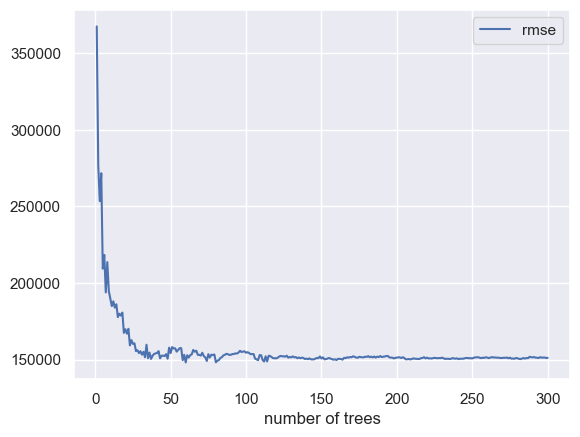

In [149]:
# plot of the r2 vs the number of trees
boosting_errors.plot();
plt.show();

## Feature Importances

In [150]:
# features
features = reg_lr.feature_names_in_

Coefficients for linear regression

In [151]:
# linear model coefficients
coefs = pd.Series(reg_lr.coef_, index=features)

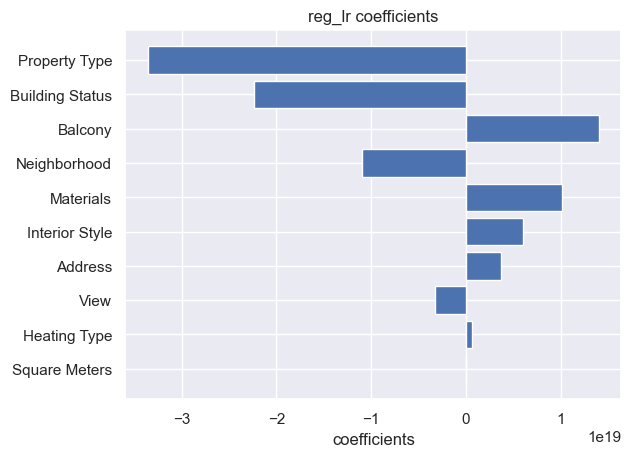

In [152]:
# group coefficients for the each encoded features
for feature in categorical_features:
    # boolean index to match each categorical feature in the new features
    idx = [(feature in i) for i in coefs.keys().to_list()]
    # remove other coefficients
    coefs_group = coefs.iloc[idx.index(True)]
    coefs = coefs[np.logical_not(idx)]
    if np.any([(feature in i) for i in features]):
        coefs[feature] = coefs_group

# sorting index
idx_sort = np.argsort(np.abs(coefs))

# plot
plt.barh(y=[coefs.keys().to_list()[i] for i in idx_sort],width=coefs.iloc[idx_sort]);
plt.title('reg_lr coefficients');
plt.xlabel('coefficients');
plt.show();

Feature Importances

In [153]:
regression_models = [reg_rf,reg_gb,reg_ab]
model_names = ['reg_rf','reg_gb','reg_ab']

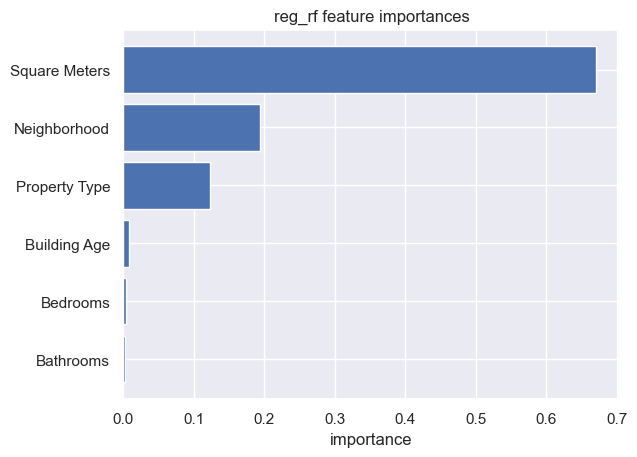

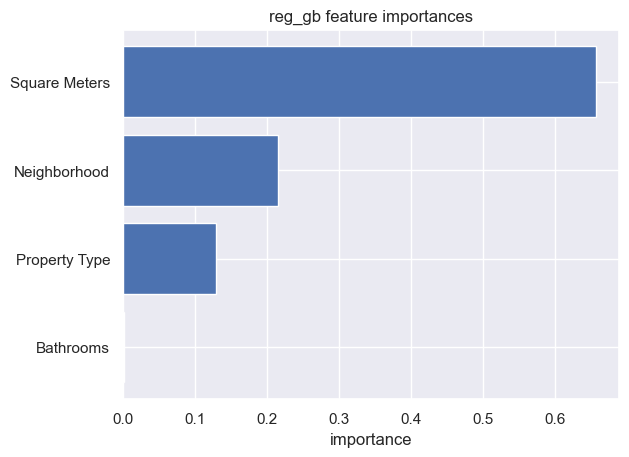

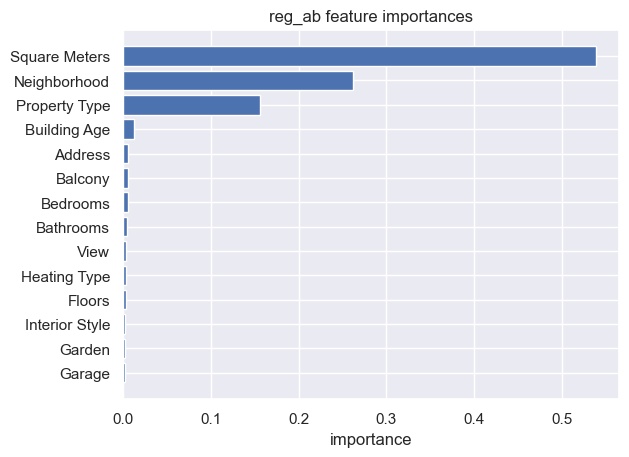

In [154]:
# feature importances
for model, model_name in zip(regression_models,model_names):
        
    imp = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    # merge features
    features = model.feature_names_in_
    for feature in categorical_features:
        # boolean index to match each categorical feature in the new features
        idx = [(feature in i) for i in imp.keys().to_list()]

        # summed mean of importances
        imp_sum = imp[idx].sum()
        imp = imp[np.logical_not(idx)]
        if np.any([(feature in i) for i in features]):
            imp[feature] = imp_sum

    # sorting index
    idx_sort = np.argsort(imp)
    
    # plot
    plt.barh(y=[imp.keys().to_list()[i] for i in idx_sort],width=imp.iloc[idx_sort]);
    plt.title(f'{model_name} feature importances');
    plt.xlabel('importance');
    plt.show();

# Summary

In [155]:
model_summary = pd.DataFrame(
    {
        'models':['dummy','linear regression','random forest', 'gradient boosting', 'ada boost'],
        'RMSE':[rmse_d,rmse_lr,rmse_rf,rmse_gb,rmse_ab],
        'R2':[r2_d,r2_lr,r2_rf,r2_gb,r2_ab]
    }
)
display(model_summary)

,models,RMSE,R2
0,dummy,920459.570800,-0.009984
1,linear regression,235979.135723,0.933618
2,random forest,120636.946368,0.982651
3,gradient boosting,45439.971026,0.997539
4,ada boost,151149.244519,0.972766


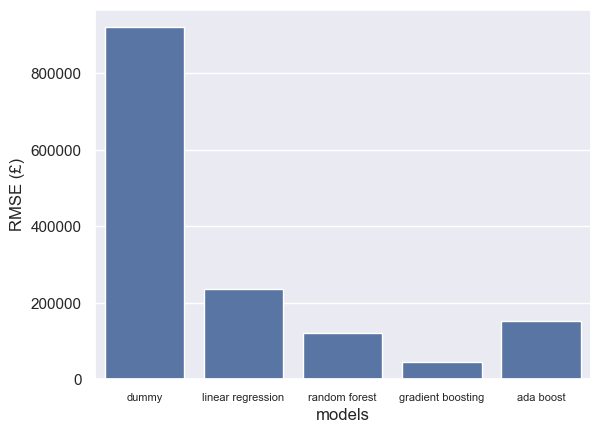

In [156]:
# plot of the RMSE vs the models
sns.barplot(model_summary,x='models',y='RMSE');
plt.xticks(fontsize=8);
plt.ylabel('RMSE (\xA3)');
plt.show();